**Name: Faiza Tasnim
Id: 19-41552-3
Section: C**

**The dataset is used here is CIFAR-10 dataset, which is imported from keras tenserflow. It is a popular choice for tasks involving image classification. This dataset contains a total of 60,000 images, each with dimensions of 32x32 pixels. This dataset help to train and validate.**

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

**Import numpy,  matpotlib from python library and also import  keras, layers,  models,  SGD,  RMSprop from tenserflow.**

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
%matplotlib inline

**Load the CIFAR-10 dataset using the custom function**

In [37]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

**Show the shape of the dataset**

In [38]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


**Give a data and train it.**

Image (#8): Which is Ship


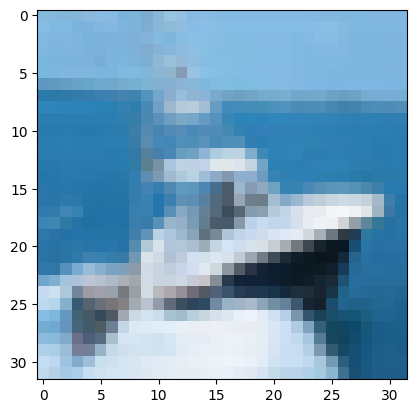

In [39]:
Cifar = 8
a = x_train[Cifar]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{Cifar}): Which is Ship")

**Following code displays a grid of images from the CIFAR-10 dataset,randomly Ploting 10 catagory in 5 rows and in 20 columns.**

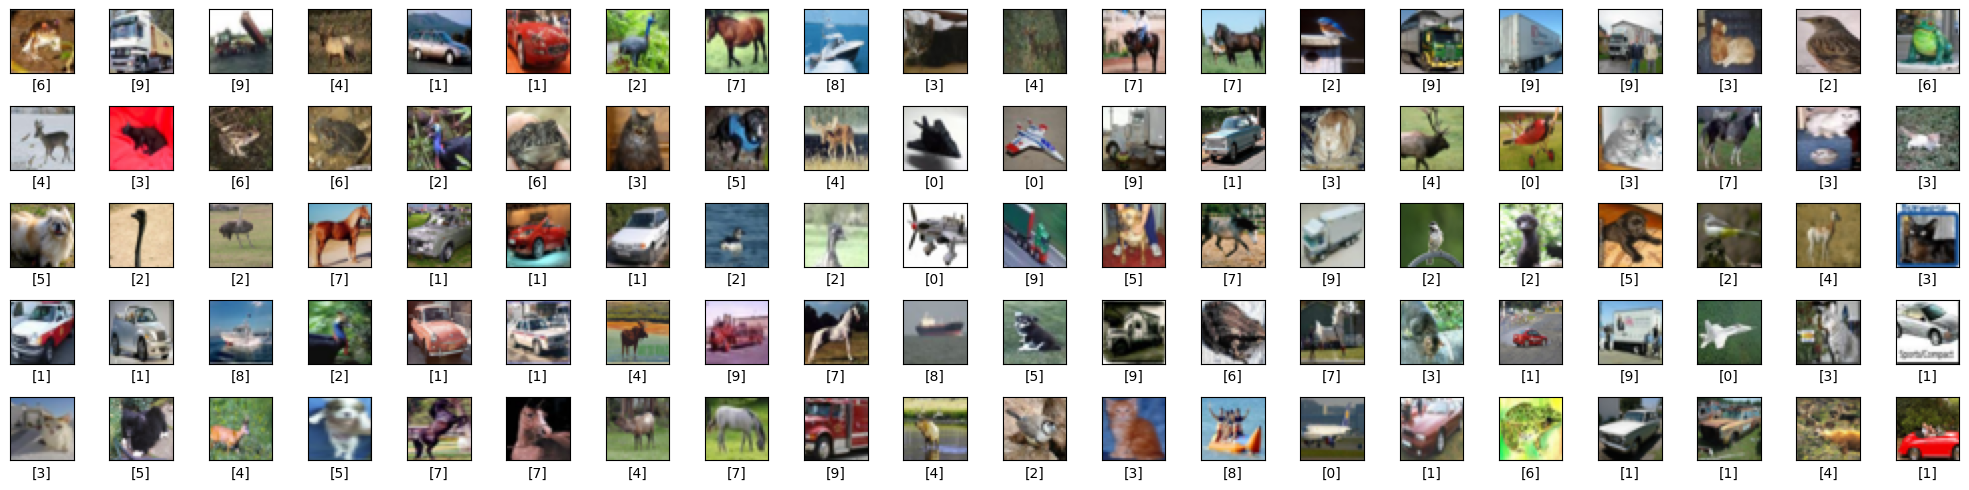

In [40]:
ROWS = 5
COLS = 20
i = 0
plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [41]:
x_train, x_test = x_train / 255.0, x_test / 255.0

**There is 10 number of classes. The model consists of three Convolutional layers with MaxPooling, followed by two Dense layers. It uses ReLU activation for hidden layers and softmax activation for the output layer. All 3 catagory models summary are displayed by using model.summary() function it is a model architecture and parameters.**

In [42]:
num_classes = 10
model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
])
model1.summary()

model2 = keras.Sequential([
     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
])
model2.summary()

model3 = keras.Sequential([
     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 2048)             

**Compile and train the model with different optimizers. 3 different models and catagories are used here.**

In [43]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model3.compile(
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Here using 10 epochs to find the accuracy and validate the data.**

In [44]:
h1 = model1.fit(x=x_train, y=y_train, epochs=10, validation_split=0.3, batch_size=20)
h2 = model2.fit(x=x_train, y=y_train, epochs=10, validation_split=0.3, batch_size=20)
h3 = model3.fit(x=x_train, y=y_train, epochs=10, validation_split=0.3, batch_size=20)

Epoch 1/10
1750/1750 [==============================] - 74s 42ms/step - loss: 1.5302 - accuracy: 0.4444 - val_loss: 1.2723 - val_accuracy: 0.5466
Epoch 2/10
1750/1750 [==============================] - 73s 42ms/step - loss: 1.1473 - accuracy: 0.5929 - val_loss: 1.1074 - val_accuracy: 0.6110
Epoch 3/10
1750/1750 [==============================] - 72s 41ms/step - loss: 0.9826 - accuracy: 0.6545 - val_loss: 1.0505 - val_accuracy: 0.6407
Epoch 4/10
1750/1750 [==============================] - 73s 41ms/step - loss: 0.8688 - accuracy: 0.6924 - val_loss: 0.9609 - val_accuracy: 0.6694
Epoch 5/10
1750/1750 [==============================] - 72s 41ms/step - loss: 0.7769 - accuracy: 0.7240 - val_loss: 0.9747 - val_accuracy: 0.6671
Epoch 6/10
1750/1750 [==============================] - 73s 42ms/step - loss: 0.6877 - accuracy: 0.7568 - val_loss: 0.9341 - val_accuracy: 0.6866
Epoch 7/10
1750/1750 [==============================] - 74s 42ms/step - loss: 0.6099 - accuracy: 0.7845 - val_loss: 0.9375 -

ADAM: Adam is a widely used optimization algorithm especially in the context of deep learning and neural networks. It stands for "Adaptive Moment Estimation". The Adam algorithm adapts the learning rates of each parameter during training, making it more efficient and robust in many cases.
Here we can see the accuracy, train accuracy and validation accuracy of Adam.

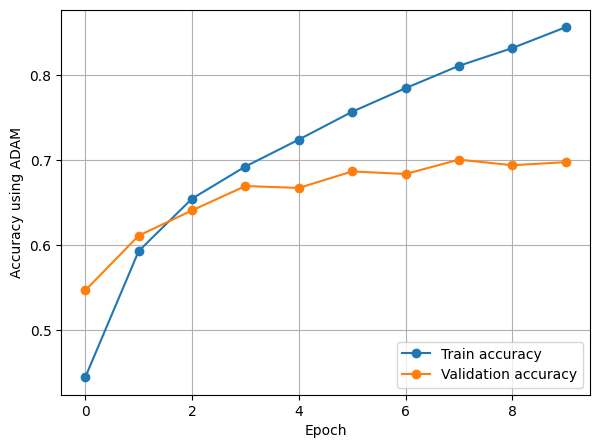

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='Train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy using ADAM')
plt.grid(True)
plt.legend(loc='lower right')

SGD: This model typically refers to a machine learning model that uses the Stochastic Gradient Descent (SGD) optimization algorithm during its training process. Stochastic Gradient Descent is a popular optimization algorithm commonly used in various machine learning models, especially in deep learning neural networks.
Here we can see the accuracy, train accuracy and validation accuracy of SGD.

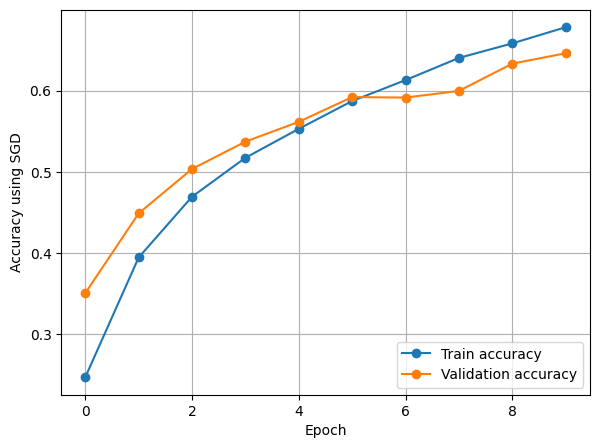

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='Train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy using SGD')
plt.grid(True)
plt.legend(loc='lower right')

RMSprop: RMSprop, which stands for Root Mean Square Propagation, is an adaptive learning rate optimization algorithm. RMSprop is not a model it is an optimization algorithm used during the training process of machine learning models, particularly in deep learning. This adaptive learning rate helps in handling different scales of gradients for different parameters and improves convergence in many cases.
Here we can see the accuracy, train accuracy and validation accuracy of RMSprop.

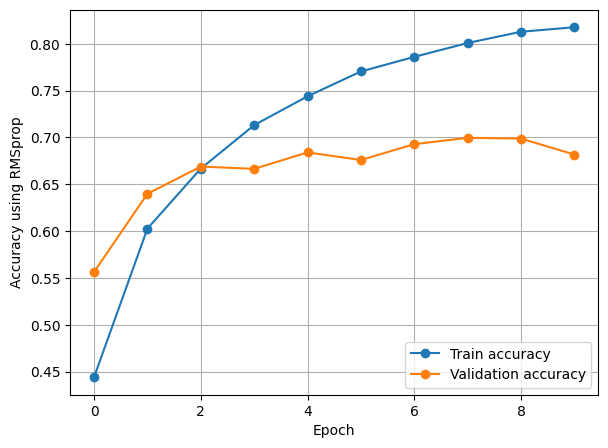

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='Train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy using RMSprop')
plt.grid(True)
plt.legend(loc='lower right')

**Show the loss using ADAM**

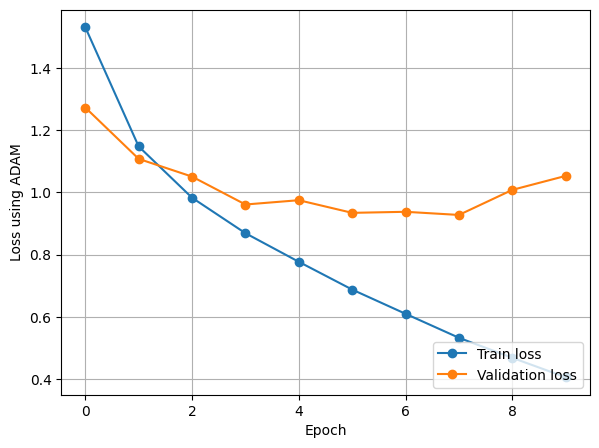

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='Train loss')
plt.plot(h1.history['val_loss'], 'o-', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss using ADAM')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

**Show the loss using SGD**

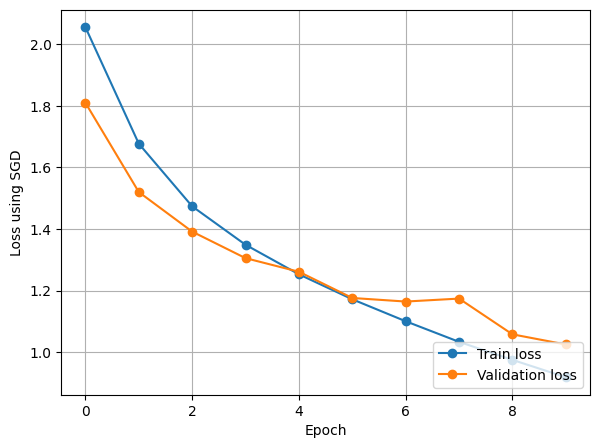

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='Train loss')
plt.plot(h2.history['val_loss'], 'o-', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss using SGD')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

**Show the loss using RMSprop**

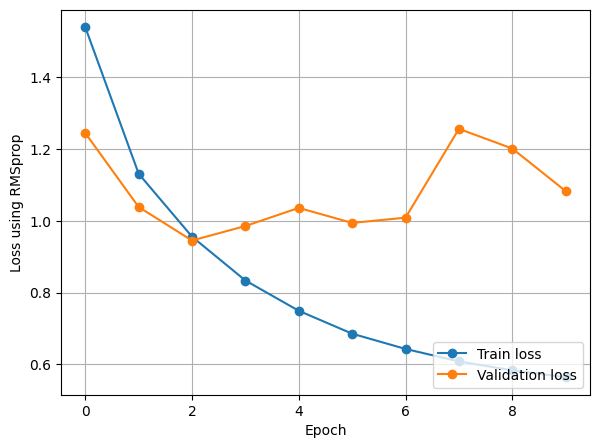

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='Train loss')
plt.plot(h3.history['val_loss'], 'o-', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss using RMSprop')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

The Adam, SGD and RMSprop depends on various factors such as the nature of the problem, the dataset, the model architecture, and the computational resources available. Adam and RMSprop are generally preferred over plain SGD in most deep learning scenarios due to their advantages. In this assaignment we can see the train accuracy, train validation, train loss, validation loss of the 3 models. And from the overfitting of the graph, accuracy rate and the rate of loss we can say that SGD is much more better and appropriate that Adam and RMSprop.